In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
df=pd.read_excel("project.xlsx",parse_dates=["Date"],index_col=[0])

In [ ]:
print(df.index.freq)

None


In [ ]:
df.shape

(861, 2)

In [ ]:
df.head()

,Wave,Wind
Date,,
2020-01-01,1526,7
2020-01-02,1478,5
2020-01-03,1441,6
2020-01-04,1431,6
2020-01-05,1469,9


In [ ]:
df.tail()

,Wave,Wind
Date,,
2022-05-06,1501,6
2022-05-07,1483,3
2022-05-08,1436,3
2022-05-09,1453,6
2022-05-10,1518,6


In [ ]:
test_split=round(len(df)*0.20)

In [ ]:
test_split

172

In [ ]:
df_for_training=df[:-172]
df_for_testing=df[-172:]

In [ ]:
print(df_for_training.shape)
print(df_for_testing.shape)

(689, 2)
(172, 2)


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_for_training_scaled = scaler.fit_transform(df_for_training)

In [ ]:
df_for_testing_scaled=scaler.transform(df_for_testing)

In [ ]:
df_for_training_scaled

array([[0.8432856 , 0.23809524],
       [0.83031613, 0.14285714],
       [0.82031883, 0.19047619],
       ...,
       [0.87327749, 0.0952381 ],
       [0.85787625, 0.14285714],
       [0.86760335, 0.42857143]])

In [ ]:
df_for_training_scaled.shape

(689, 2)

In [ ]:
df_for_testing_scaled.shape

(172, 2)

In [ ]:
def createXY(dataset,n_past):
    dataX = []
    dataY = []
    for i in range(n_past, len(dataset)):
            dataX.append(dataset[i - n_past:i, 0:dataset.shape[1]])
            dataY.append(dataset[i,0])
    return np.array(dataX),np.array(dataY)   

In [ ]:
trainX,trainY=createXY(df_for_training_scaled,7)

In [ ]:
trainX.shape

(682, 7, 2)

In [ ]:
testX,testY=createXY(df_for_testing_scaled,7)

In [ ]:
trainX[0]

array([[0.8432856 , 0.23809524],
       [0.83031613, 0.14285714],
       [0.82031883, 0.19047619],
       [0.81761686, 0.19047619],
       [0.82788436, 0.33333333],
       [0.83734126, 0.23809524],
       [0.82112942, 0.19047619]])

In [ ]:
print("trainX Shape-- ",trainX.shape)
print("trainY Shape-- ",trainY.shape)

trainX Shape--  (682, 7, 2)
trainY Shape--  (682,)


In [ ]:
print("testX Shape-- ",testX.shape)
print("testY Shape-- ",testY.shape)

testX Shape--  (165, 7, 2)
testY Shape--  (165,)


In [ ]:
print("trainX[0]-- \n",trainX[0])
print("\ntrainY[0]-- ",trainY[0])

trainX[0]-- 
 [[0.8432856  0.23809524]
 [0.83031613 0.14285714]
 [0.82031883 0.19047619]
 [0.81761686 0.19047619]
 [0.82788436 0.33333333]
 [0.83734126 0.23809524]
 [0.82112942 0.19047619]]

trainY[0]--  0.8305863280194541


In [ ]:
trainY[0]

0.8305863280194541

In [ ]:
trainY.shape

(682,)

In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(7,2)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(2))
   

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(testX,testY))
parameters = {'batch_size' : [16,20],
              'epochs' : [8,10],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':


In [ ]:
grid_search = grid_search.fit(trainX,trainY)

Epoch 1/8
22/22 [==============================] - 5s 55ms/step - loss: 0.3256 - val_loss: 0.0371
Epoch 2/8
22/22 [==============================] - 0s 12ms/step - loss: 0.0314 - val_loss: 0.0036
Epoch 3/8
22/22 [==============================] - 0s 12ms/step - loss: 0.0164 - val_loss: 0.0020
Epoch 4/8
22/22 [==============================] - 0s 12ms/step - loss: 0.0156 - val_loss: 0.0018
Epoch 5/8
22/22 [==============================] - 0s 11ms/step - loss: 0.0134 - val_loss: 0.0022
Epoch 6/8
22/22 [==============================] - 0s 12ms/step - loss: 0.0139 - val_loss: 0.0022
Epoch 7/8
22/22 [==============================] - 0s 12ms/step - loss: 0.0146 - val_loss: 0.0024
Epoch 8/8
22/22 [==============================] - 0s 4ms/step - loss: 0.0041
Epoch 1/8
22/22 [==============================] - 5s 55ms/step - loss: 0.3255 - val_loss: 0.0502
Epoch 2/8
22/22 [==============================] - 0s 12ms/step - loss: 0.0277 - val_loss: 0.0043
Epoch 3/8
22/22 [=======================

In [ ]:
grid_search.best_params_

{'batch_size': 16, 'epochs': 10, 'optimizer': 'adam'}

In [ ]:
my_model=grid_search.best_estimator_.model

In [ ]:
my_model

In [ ]:
prediction=my_model.predict(testX)

In [ ]:
print("prediction\n", prediction)
print("\nPrediction Shape-",prediction.shape)

prediction
 [[0.83242923 0.83529574]
 [0.83198607 0.8354429 ]
 [0.83067536 0.83492476]
 [0.83089864 0.8352437 ]
 [0.8371484  0.8418595 ]
 [0.8405603  0.8435399 ]
 [0.84093845 0.84354657]
 [0.8412101  0.84362775]
 [0.84257627 0.8456114 ]
 [0.842003   0.8452156 ]
 [0.84032    0.84328145]
 [0.83753264 0.84055954]
 [0.8367754  0.8399798 ]
 [0.8335749  0.8373469 ]
 [0.8303333  0.8338019 ]
 [0.83083403 0.83390814]
 [0.83773303 0.84047943]
 [0.8392499  0.8418847 ]
 [0.83608174 0.8392015 ]
 [0.8353572  0.8388453 ]
 [0.83483505 0.83775264]
 [0.834499   0.8366864 ]
 [0.8339764  0.8362424 ]
 [0.83480716 0.83762825]
 [0.83531636 0.83854204]
 [0.8345486  0.8376283 ]
 [0.8343229  0.83689433]
 [0.83450806 0.83727425]
 [0.8344278  0.8371708 ]
 [0.8335142  0.83648264]
 [0.83098936 0.83430153]
 [0.8301933  0.83347934]
 [0.8290293  0.8319182 ]
 [0.82724774 0.8298402 ]
 [0.82541895 0.82812315]
 [0.8256315  0.828651  ]
 [0.8242376  0.8270499 ]
 [0.8230643  0.8249809 ]
 [0.81892586 0.8202071 ]
 [0.8156172  

In [ ]:
prediction.shape

(165, 2)

In [ ]:
scaler.inverse_transform(prediction)

array([[1485.8206  ,   19.54121 ],
       [1484.1804  ,   19.5443  ],
       [1479.3295  ,   19.53342 ],
       [1480.1558  ,   19.540117],
       [1503.2863  ,   19.67905 ],
       [1515.9137  ,   19.714338],
       [1517.3131  ,   19.714478],
       [1518.3186  ,   19.716183],
       [1523.3748  ,   19.75784 ],
       [1521.253   ,   19.749527],
       [1515.0243  ,   19.70891 ],
       [1504.7083  ,   19.65175 ],
       [1501.9058  ,   19.639576],
       [1490.0607  ,   19.584286],
       [1478.0635  ,   19.50984 ],
       [1479.9167  ,   19.512072],
       [1505.45    ,   19.650068],
       [1511.0638  ,   19.679579],
       [1499.3385  ,   19.623232],
       [1496.6569  ,   19.615751],
       [1494.7245  ,   19.592806],
       [1493.4807  ,   19.570414],
       [1491.5465  ,   19.56109 ],
       [1494.6212  ,   19.590193],
       [1496.5057  ,   19.609383],
       [1493.6643  ,   19.590195],
       [1492.8291  ,   19.574781],
       [1493.5143  ,   19.58276 ],
       [1493.2172  ,

In [ ]:
prediction_copies_array = np.repeat(prediction,1, axis=-1)

In [ ]:
prediction_copies_array.shape

(165, 2)

In [ ]:
prediction_copies_array

array([[0.83242923, 0.83529574],
       [0.83198607, 0.8354429 ],
       [0.83067536, 0.83492476],
       [0.83089864, 0.8352437 ],
       [0.8371484 , 0.8418595 ],
       [0.8405603 , 0.8435399 ],
       [0.84093845, 0.84354657],
       [0.8412101 , 0.84362775],
       [0.84257627, 0.8456114 ],
       [0.842003  , 0.8452156 ],
       [0.84032   , 0.84328145],
       [0.83753264, 0.84055954],
       [0.8367754 , 0.8399798 ],
       [0.8335749 , 0.8373469 ],
       [0.8303333 , 0.8338019 ],
       [0.83083403, 0.83390814],
       [0.83773303, 0.84047943],
       [0.8392499 , 0.8418847 ],
       [0.83608174, 0.8392015 ],
       [0.8353572 , 0.8388453 ],
       [0.83483505, 0.83775264],
       [0.834499  , 0.8366864 ],
       [0.8339764 , 0.8362424 ],
       [0.83480716, 0.83762825],
       [0.83531636, 0.83854204],
       [0.8345486 , 0.8376283 ],
       [0.8343229 , 0.83689433],
       [0.83450806, 0.83727425],
       [0.8344278 , 0.8371708 ],
       [0.8335142 , 0.83648264],
       [0.

In [ ]:
pred=scaler.inverse_transform(np.reshape(prediction_copies_array,(len(prediction),2)))[:,0]

In [ ]:
pred

array([1485.8206, 1484.1804, 1479.3295, 1480.1558, 1503.2863, 1515.9137,
       1517.3131, 1518.3186, 1523.3748, 1521.253 , 1515.0243, 1504.7083,
       1501.9058, 1490.0607, 1478.0635, 1479.9167, 1505.45  , 1511.0638,
       1499.3385, 1496.6569, 1494.7245, 1493.4807, 1491.5465, 1494.6212,
       1496.5057, 1493.6643, 1492.8291, 1493.5143, 1493.2172, 1489.836 ,
       1480.4916, 1477.5453, 1473.2374, 1466.6438, 1459.8755, 1460.6621,
       1455.5033, 1451.161 , 1435.8446, 1423.5992, 1415.0092, 1404.8822,
       1395.2548, 1408.9061, 1431.3435, 1459.6866, 1459.4863, 1434.6304,
       1413.7174, 1394.4315, 1360.7242, 1327.6776, 1298.7218, 1283.4651,
       1287.472 , 1273.7152, 1291.6086, 1325.2115, 1341.4552, 1350.8191,
       1356.8167, 1343.2769, 1329.3599, 1277.3296, 1216.2665, 1164.522 ,
       1115.9807, 1081.0057, 1157.1505, 1187.6422, 1216.3309, 1242.5024,
       1270.9789, 1304.7682, 1322.6436, 1321.3206, 1318.169 , 1289.0679,
       1267.2985, 1241.5526, 1231.425 , 1238.8275, 

In [ ]:
original_copies_array = np.repeat(testY,2, axis=-1)

original_copies_array.shape

original=scaler.inverse_transform(np.reshape(original_copies_array,(len(testY),2)))[:,0]

In [ ]:
pred

array([1485.8206, 1484.1804, 1479.3295, 1480.1558, 1503.2863, 1515.9137,
       1517.3131, 1518.3186, 1523.3748, 1521.253 , 1515.0243, 1504.7083,
       1501.9058, 1490.0607, 1478.0635, 1479.9167, 1505.45  , 1511.0638,
       1499.3385, 1496.6569, 1494.7245, 1493.4807, 1491.5465, 1494.6212,
       1496.5057, 1493.6643, 1492.8291, 1493.5143, 1493.2172, 1489.836 ,
       1480.4916, 1477.5453, 1473.2374, 1466.6438, 1459.8755, 1460.6621,
       1455.5033, 1451.161 , 1435.8446, 1423.5992, 1415.0092, 1404.8822,
       1395.2548, 1408.9061, 1431.3435, 1459.6866, 1459.4863, 1434.6304,
       1413.7174, 1394.4315, 1360.7242, 1327.6776, 1298.7218, 1283.4651,
       1287.472 , 1273.7152, 1291.6086, 1325.2115, 1341.4552, 1350.8191,
       1356.8167, 1343.2769, 1329.3599, 1277.3296, 1216.2665, 1164.522 ,
       1115.9807, 1081.0057, 1157.1505, 1187.6422, 1216.3309, 1242.5024,
       1270.9789, 1304.7682, 1322.6436, 1321.3206, 1318.169 , 1289.0679,
       1267.2985, 1241.5526, 1231.425 , 1238.8275, 

In [ ]:
print("Pred Values-- " ,pred)
print("\nOriginal Values-- ",original)

Pred Values--  [1485.8206 1484.1804 1479.3295 1480.1558 1503.2863 1515.9137 1517.3131
 1518.3186 1523.3748 1521.253  1515.0243 1504.7083 1501.9058 1490.0607
 1478.0635 1479.9167 1505.45   1511.0638 1499.3385 1496.6569 1494.7245
 1493.4807 1491.5465 1494.6212 1496.5057 1493.6643 1492.8291 1493.5143
 1493.2172 1489.836  1480.4916 1477.5453 1473.2374 1466.6438 1459.8755
 1460.6621 1455.5033 1451.161  1435.8446 1423.5992 1415.0092 1404.8822
 1395.2548 1408.9061 1431.3435 1459.6866 1459.4863 1434.6304 1413.7174
 1394.4315 1360.7242 1327.6776 1298.7218 1283.4651 1287.472  1273.7152
 1291.6086 1325.2115 1341.4552 1350.8191 1356.8167 1343.2769 1329.3599
 1277.3296 1216.2665 1164.522  1115.9807 1081.0057 1157.1505 1187.6422
 1216.3309 1242.5024 1270.9789 1304.7682 1322.6436 1321.3206 1318.169
 1289.0679 1267.2985 1241.5526 1231.425  1238.8275 1241.4581 1276.9628
 1316.3888 1350.3849 1366.3799 1393.3153 1395.3811 1383.7837 1365.7373
 1344.4308 1317.2648 1288.1327 1260.5422 1228.2634 1190.7448 11

In [ ]:
import matplotlib.pyplot as plt

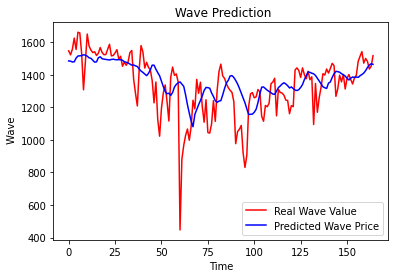

In [ ]:
plt.plot(original, color = 'red', label = 'Real Wave Value')
plt.plot(pred, color = 'blue', label = 'Predicted Wave Price')
plt.title(' Wave Prediction')
plt.xlabel('Time')
plt.ylabel(' Wave')
plt.legend()
plt.show()

In [ ]:
df_30_days_past=df.iloc[-7:,:]

In [ ]:
df_30_days_past

,Wave,Wind
Date,,
2022-05-04,1543,7
2022-05-05,1472,7
2022-05-06,1501,6
2022-05-07,1483,3
2022-05-08,1436,3
2022-05-09,1453,6
2022-05-10,1518,6
